# data processing

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
from datetime import datetime

In [2]:
from statsmodels.tsa.arima_process import ArmaProcess

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from causalimpact import CausalImpact

# setup

In [5]:
np.random.seed(42)
arprarams = np.array([0.95, 0.05])
maparams = np.array([0.6, 0.3])
arma_process = ArmaProcess.from_coeffs(arcoefs=arprarams, macoefs=maparams)
x = 10 + arma_process.generate_sample(nsample=500)
y = 2 * x + np.random.normal(size=500)
y[300:] += 10

# create date

In [6]:
dates = pd.date_range(start='2021-01-01', freq='D', periods=500)
data = pd.DataFrame({'dates':dates, 'y':y, 'x':x})
data.set_index('dates', inplace=True)

In [7]:
data.head()

,y,x
dates,,
2021-01-01,21.919606,10.496714
2021-01-02,23.172702,10.631643
2021-01-03,21.278713,11.338640
2021-01-04,26.909878,13.173454
2021-01-05,27.260727,13.955685


# set pre and post periods

In [8]:
print(f'the time series start date is :{data.index.min()}')
print(f'the time series end date is :{data.index.max()}')
print(f'the treatment start date is :{data.index[300]}')

the time series start date is :2021-01-01 00:00:00
the time series end date is :2022-05-15 00:00:00
the treatment start date is :2021-10-28 00:00:00


# visialize the time

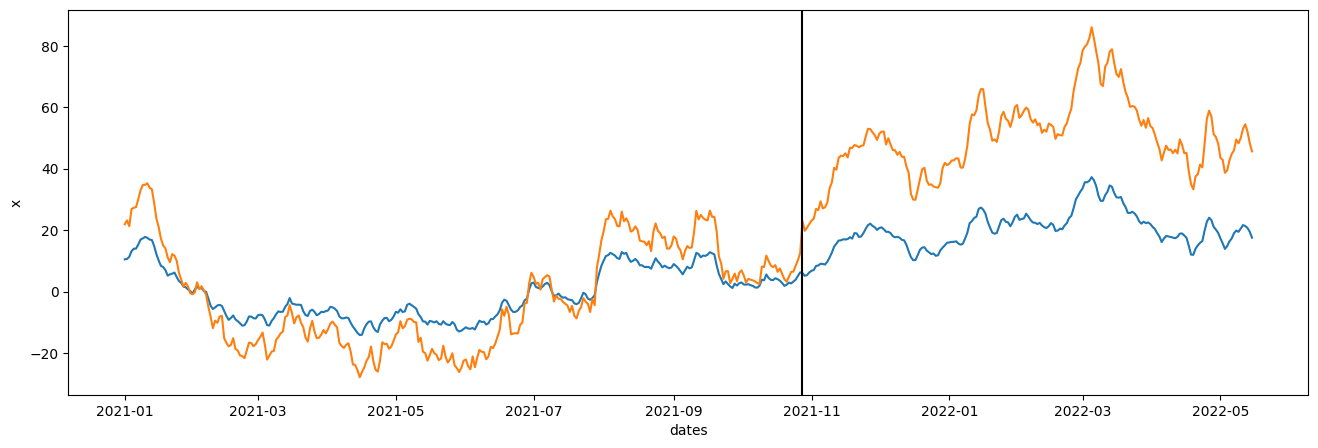

In [9]:
plt.figure(figsize=(16,5))
sns.lineplot(x=data.index, y=data['x'])
sns.lineplot(x=data.index, y=data['y'])
plt.axvline(x=data.index[300], color='black')

In [10]:
pre_period = [str(data.index.min())[:10], str(data.index[299])[:10]]
post_period = [str(data.index[300])[:10], str(data.index.max())[:10]]
print(f'the pre period is {pre_period}')
print(f'the post period is {post_period}')

the pre period is ['2021-01-01', '2021-10-27']
the post period is ['2021-10-28', '2022-05-15']


# raw difference

In [11]:
pre_daily_average = data['y'][:300].mean()
post_daily_average = data['y'][300:].mean()

print(f'pre daily average is {pre_daily_average}')
print(f'post daily average is {post_daily_average}')

pre daily average is -1.6403416947312546
post daily average is 50.08461262581729


# causal impact time series

In [12]:
impact = CausalImpact(data=data, pre_period=pre_period, post_period=post_period)

C:\Users\yandiher\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yandiher\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\optimizer.py:17: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score. The list of unsupported keyword arguments passed include: standardize, nseasons. After release 0.14, this will raise.
  warnings.warn(
C:\Users\yandiher\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


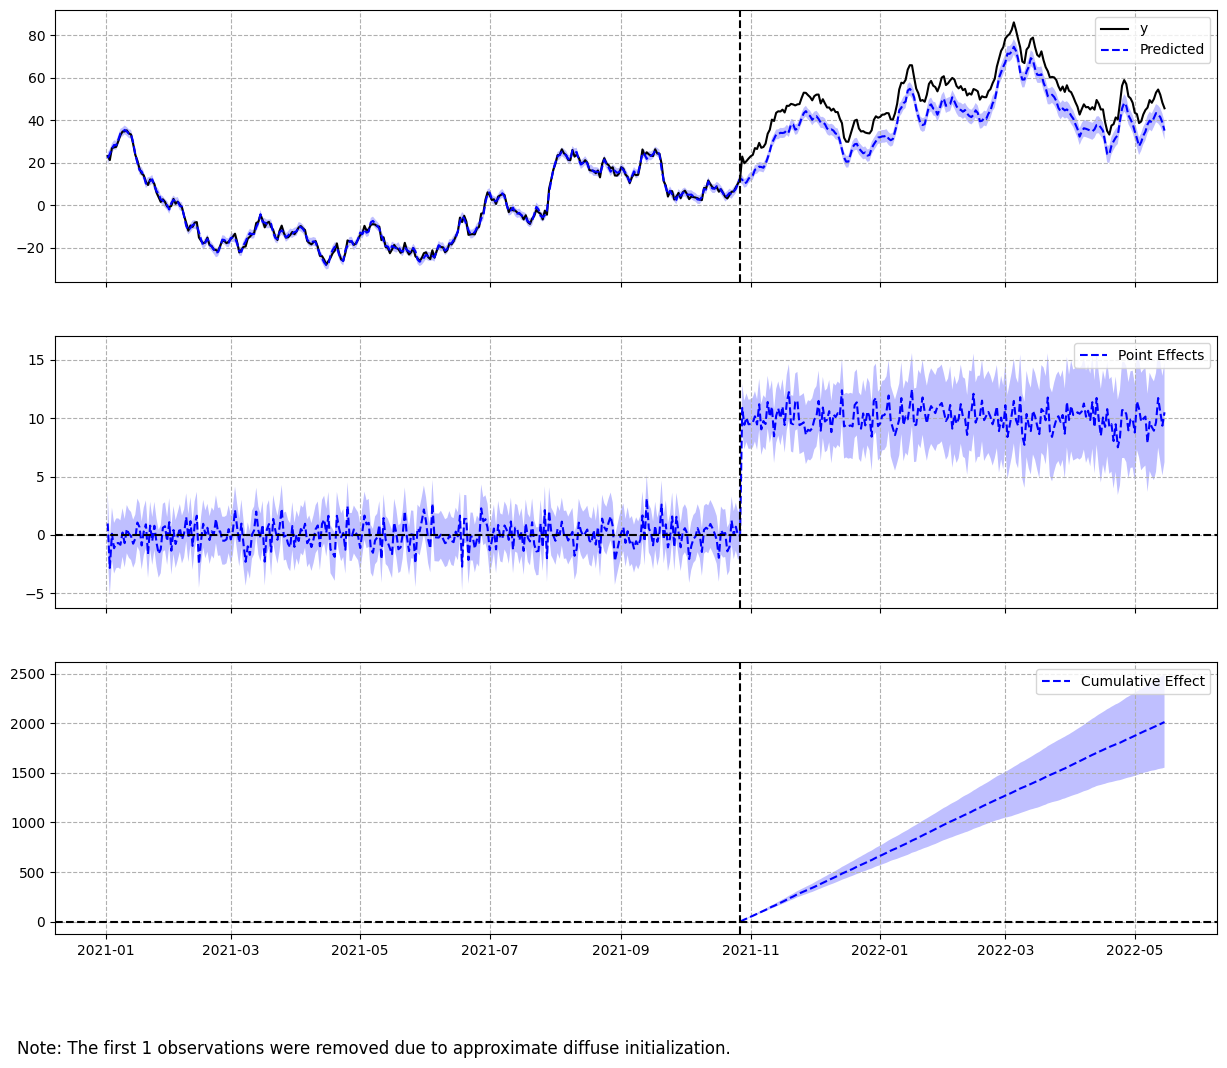

In [13]:
impact.plot()

In [15]:
print(impact.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    50.08              10016.92
Prediction (s.d.)         40.03 (1.2)        8005.59 (239.36)
95% CI                    [37.64, 42.33]     [7527.61, 8465.89]

Absolute effect (s.d.)    10.06 (1.2)        2011.33 (239.36)
95% CI                    [7.76, 12.45]      [1551.03, 2489.31]

Relative effect (s.d.)    25.12% (2.99%)     25.12% (2.99%)
95% CI                    [19.37%, 31.09%]   [19.37%, 31.09%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


In [17]:
print(impact.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 50.08. By contrast, in the absence of an
intervention, we would have expected an average response of 40.03.
The 95% interval of this counterfactual prediction is [37.64, 42.33].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 10.06 with a 95% interval of
[7.76, 12.45]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 10016.92.
By contrast, had the intervention not taken place, we would have expected
a sum of 8005.59. The 95% interval of this prediction is [7527.61, 8465.89].


The above results are given in terms of absolute numbers. In relative
terms, the response va